In [63]:
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic') # For Windows



In [71]:
from matplotlib import font_manager, rc
font_manager.findSystemFonts()
font_location = 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf' # For Windows
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [1]:
import urllib.parse
import pandas as pd
import requests
import datetime as dt

api_key = "MXuDGTdMFajqFoxWmhRaZzPYYuiMDr51"

# 경매장 판매 시세 검색
def call_store(itemname) :
    # urname url 형식으로 변환 필요
    itemname_url = urllib.parse.quote(itemname)
    requestData = requests.get(f'https://api.neople.co.kr/df/auction-sold?itemName={itemname_url}&limit=100&apikey={api_key}')
    if requestData.status_code == 200 :
        jsonData = requestData.json()
        api_result = pd.DataFrame(jsonData['rows'])
        return api_result
    else :
        fail = (f"오류코드 : {requestData.status_code}")
        return fail
    
# 쌓는 데이터 불러오기
try:
    # 기존 데이터를 읽음
    total_df = pd.read_excel("Stack_Store_Price.xlsx")
except FileNotFoundError:
    # 파일이 없으면 새로운 데이터프레임 생성
    total_df = pd.DataFrame(columns=['Time', 'itemName', 'unitPrice'])

# 검색목록
itemname_list = ['무색 큐브 조각', '모순의 결정체', '레어 소울 결정', '유니크 소울 결정', '레전더리 소울 결정', '에픽 소울 결정', '태초 소울 결정']

# 분석한 시간 저장
search_time = dt.datetime.today().strftime('%Y-%m-%d %H:%M')

for i in itemname_list :
    df_item_price = call_store(i)
    try :
        df_item_price = df_item_price.groupby('itemName')["unitPrice"].mean().astype(int).reset_index()
    except KeyError :
        pass
    df_item_price['Time'] = search_time
    total_df = pd.concat([total_df, df_item_price])

total_df.to_excel("Stack_Store_Price.xlsx", index = False)


In [2]:
df= pd.pivot_table(
    total_df,
    index='Time',
    columns = 'itemName',
    values = 'unitPrice'
)
df


itemName,레어 소울 결정,레전더리 소울 결정,모순의 결정체,무색 큐브 조각,에픽 소울 결정,유니크 소울 결정,태초 소울 결정
Time,,,,,,,
2025-01-17 13:02,141041.0,2210479.0,47269.0,46.0,8741103.0,403637.0,NaN
2025-01-18 23:48,168060.0,2322732.0,51457.0,49.0,7932722.0,508080.0,NaN
2025-01-20 11:15,169282.0,2643067.0,50172.0,48.0,8016844.0,402608.0,NaN
2025-01-21 09:46,193974.0,2859111.0,54466.0,52.0,9462087.0,488182.0,NaN
2025-01-22 12:30,176483.0,3068275.0,52005.0,50.0,9670980.0,477167.0,NaN
2025-01-23 10:40,141907.0,2528344.0,52076.0,48.0,8858931.0,351769.0,NaN
2025-01-24 14:32,144796.0,2211168.0,45418.0,43.0,7885026.0,345318.0,NaN
2025-01-26 11:49,144730.0,2374667.0,43902.0,42.0,8116586.0,399862.0,NaN
2025-01-26 11:50,144437.0,2382873.0,43900.0,42.0,8113922.0,399526.0,83926292.0


itemName,레어 소울 결정,레전더리 소울 결정,모순의 결정체,무색 큐브 조각,에픽 소울 결정,유니크 소울 결정,태초 소울 결정
Time,,,,,,,
2025-01-17 13:02,141041.0,2210479.0,47269.0,46.0,8741103.0,403637.0,NaN
2025-01-18 23:48,168060.0,2322732.0,51457.0,49.0,7932722.0,508080.0,NaN
2025-01-20 11:15,169282.0,2643067.0,50172.0,48.0,8016844.0,402608.0,NaN
2025-01-21 09:46,193974.0,2859111.0,54466.0,52.0,9462087.0,488182.0,NaN
2025-01-22 12:30,176483.0,3068275.0,52005.0,50.0,9670980.0,477167.0,NaN
2025-01-23 10:40,141907.0,2528344.0,52076.0,48.0,8858931.0,351769.0,NaN
2025-01-24 14:32,144796.0,2211168.0,45418.0,43.0,7885026.0,345318.0,NaN
2025-01-26 11:49,144730.0,2374667.0,43902.0,42.0,8116586.0,399862.0,NaN
2025-01-26 11:50,144437.0,2382873.0,43900.0,42.0,8113922.0,399526.0,83926292.0


In [49]:
df['Time'] = pd.to_datetime(df['Time'])

In [50]:
df['Time'] = df['Time'].dt.strftime("%m-%d")

In [51]:
df

itemName,Time,레어 소울 결정,레전더리 소울 결정,모순의 결정체,무색 큐브 조각,에픽 소울 결정,유니크 소울 결정,태초 소울 결정
0,01-17,141041.0,2210479.0,47269.0,46.0,8741103.0,403637.0,NaN
1,01-18,168060.0,2322732.0,51457.0,49.0,7932722.0,508080.0,NaN
2,01-20,169282.0,2643067.0,50172.0,48.0,8016844.0,402608.0,NaN
3,01-21,193974.0,2859111.0,54466.0,52.0,9462087.0,488182.0,NaN
4,01-22,176483.0,3068275.0,52005.0,50.0,9670980.0,477167.0,NaN
5,01-23,141907.0,2528344.0,52076.0,48.0,8858931.0,351769.0,NaN
6,01-24,144796.0,2211168.0,45418.0,43.0,7885026.0,345318.0,NaN
7,01-26,144730.0,2374667.0,43902.0,42.0,8116586.0,399862.0,NaN
8,01-26,144437.0,2382873.0,43900.0,42.0,8113922.0,399526.0,83926292.0
9,01-27,147501.0,2405232.0,41591.0,41.0,7807929.0,365565.0,84002391.0


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

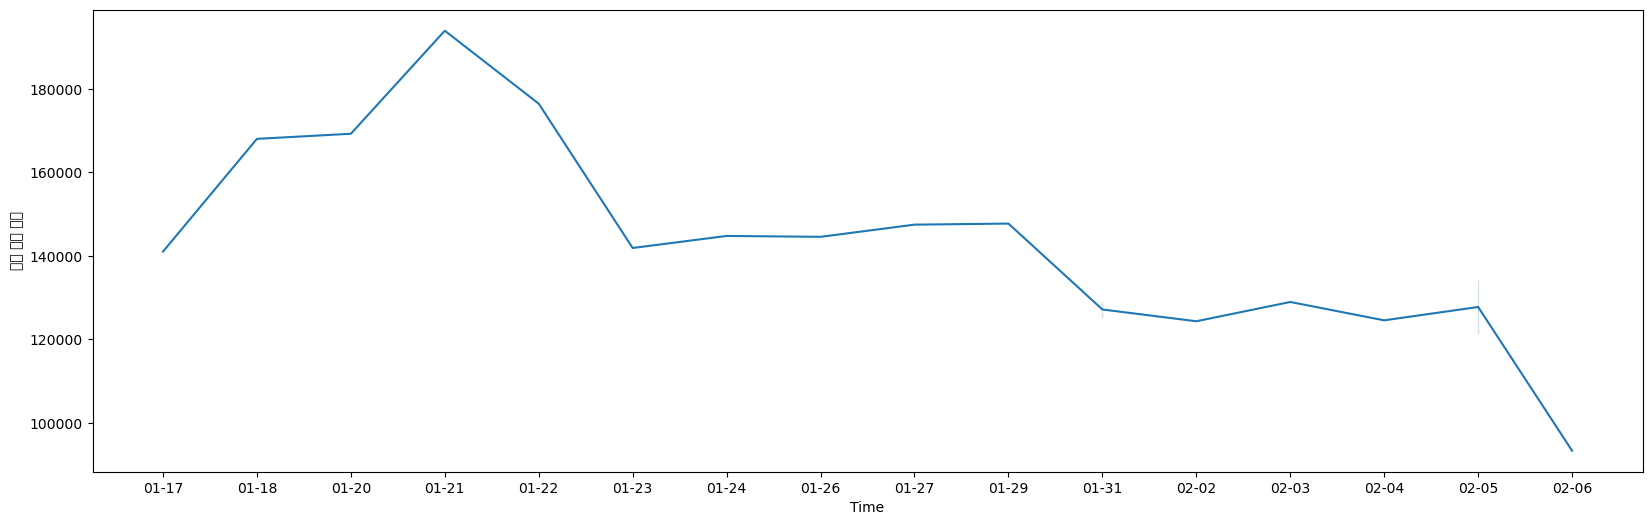

In [72]:
plt.figure(figsize=(20,6))

sns.lineplot(x = 'Time', y = '레어 소울 결정', data = df)
plt.show()

In [13]:
tips = sns.load_dataset("tips")

In [14]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
